<a href="https://colab.research.google.com/github/rujool11/ML-learning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction to regression with tensorflow**

Predicting a numerical value based on come combination of variables

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


### **Create data to view and fit**

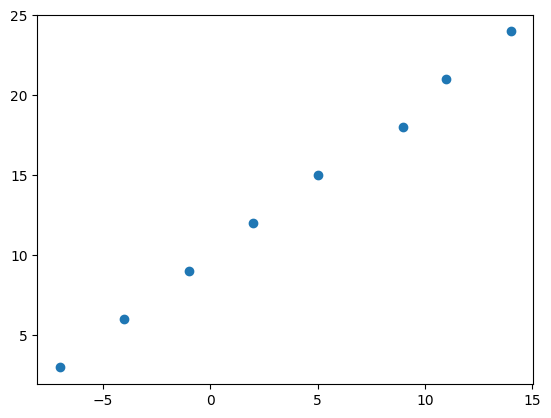

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.,-4.,-1.,2.,5.,9.,11.,14.])
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])
plt.scatter(X,y)

In [ ]:
y == X + 10 #relationship between X and y in this case

array([ True,  True,  True,  True,  True, False,  True,  True])

### **Input and output shapes**

In [ ]:
# demo tensor for housing problem
house_info = tf.constant(['bedrooms','area','locality'])
house_price = tf.constant([977979])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrooms', b'area', b'locality'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([977979], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape #we will use one X value to predict one y value

((), ())

In [ ]:
# turn np array into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  9., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## **Steps in modelling**

1. Creating model - define input and output layers, as well as hidden layers

2. Compile model - define the loss function, optimizer and evalutation metrics

3. Fit model - fit it to X to get predictions

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])  # simple regression problems, we are solving as standard regression but using neural networks, so one layer with one unit

''' model can also be made in the following way --
      model = tf.keras.Sequential()
      model.add(tf.keras.layers.Dense(1))
'''

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae']) # mean absolute error and stochastic gradient descent optimizer

model.fit(tf.expand_dims(X,axis=-1),y,epochs=50) # one epoch is one full cycle through training data


Epoch 1/50
1/1 [==============================] - 0s 371ms/step - loss: 14.9896 - mae: 14.9896
Epoch 2/50
1/1 [==============================] - 0s 11ms/step - loss: 14.8482 - mae: 14.8482
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 14.7068 - mae: 14.7068
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 14.5654 - mae: 14.5654
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 14.4240 - mae: 14.4240
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 14.2826 - mae: 14.2826
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 14.1412 - mae: 14.1412
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 13.9998 - mae: 13.9998
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 13.8583 - mae: 13.8583
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 13.7169 - mae: 13.7169
Epoch 11/50
1/1 [==============================] - 0s 17ms

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  9., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#make prediction for x = 17 (y should be 27 since y = x+10)
model.predict([17.]),

1/1 [==============================] - 0s 53ms/step


(array([[24.326813]], dtype=float32),)

### **Improving model**

1. **Creation** - might add more layers, increase the number of units, etc

2. **Compilation** - might change the optimization function, or learning rate

3. **Fitting** - might fit the model for more epochs, or on more examples

model should be improved in steps, to avoid overutilization of resources (we dont do that in the next example, but is good practise that should usually be followed)




In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)

])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# learning rate is usually the most important hyperparameter

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100) # one epoch is one full cycle through training data


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.6304 - mae: 12.6304
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9989 - mae: 9.9989
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 7.9487 - mae: 7.9487
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 5.5745 - mae: 5.5745
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 3.7619 - mae: 3.7619
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 5.2280 - mae: 5.2280
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 5.7804 - mae: 5.7804
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 5.7050 - mae: 5.7050
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 5.2129 - mae: 5.2129
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 4.4147 - mae: 4.4147
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - lo

In [ ]:
model.predict([17.0]) # model is now very close

1/1 [==============================] - 0s 340ms/step


array([[26.437546]], dtype=float32)

### **Evaluating a model**

build -> fit -> evaluate -> tweak -> fit -> evaluate -> ....

visualize your model (data, model, training)

how predictions line up against actual data

In [ ]:
# make a bigger dataset

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

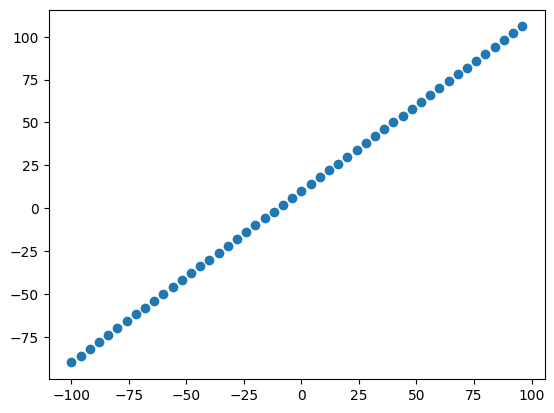

In [ ]:
plt.scatter(X, y)

**Three sets** --

training set, test set (also cv set, but that will be discussed later)

training set - the model learns from this, typically 70-80% of data, study material

validation set - the model get tuned on this data, 10-15% of available data, practise exam

test set - model gets evaluated on this data, 10-15% of total, final exam

generalization - ability for an ML model to perform well on data it hasnt seen before




In [ ]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

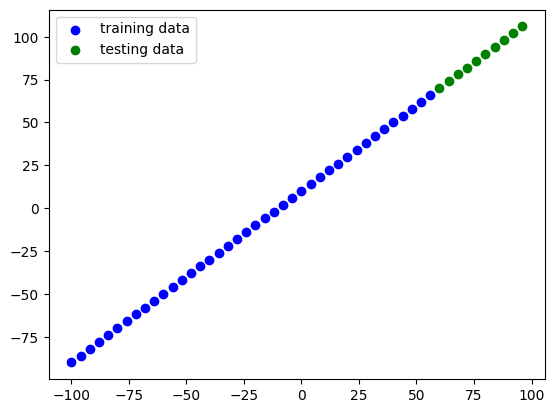

In [ ]:
plt.scatter(X_train,y_train,c='b',label='training data')
plt.scatter(X_test,y_test,c='g',label='testing data')
plt.legend()

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1,input_shape=[10])# input shape added since we are calling summary() before building the model
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                20        
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=100,verbose=0) # verbose 0 does not give output, 1 is default

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                20        
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


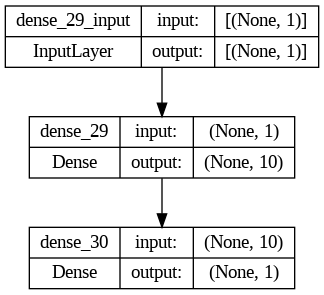

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 42ms/step


array([[63.775707],
       [67.57145 ],
       [71.36719 ],
       [75.16293 ],
       [78.95868 ],
       [82.75443 ],
       [86.55017 ],
       [90.34592 ],
       [94.141655],
       [97.9374  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

### **visualizing predictions**


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  plt.scatter(train_data,train_labels,c='b',label='training data')
  plt.scatter(test_data,test_labels,c='g',label='test data')
  plt.scatter(test_data,predictions,c='r',label='predictions')
  plt.legend();


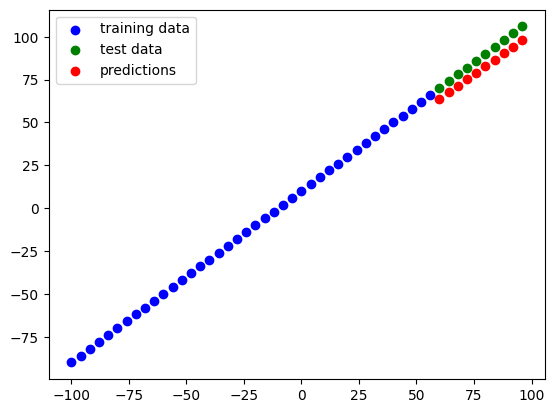

In [ ]:
plot_predictions()

### **Evalutation metrics**

depends on type of problem, this is a regression problem

MAE (mean absolute error) and MSE (mean square error) are two important metrics

Huber (combination of MSE and MAE, less sensetive to outliers than MSE)

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 101ms/step - loss: 7.1434 - mae: 7.1434


[7.143446445465088, 7.143446445465088]

In [ ]:
y_pred = tf.constant(y_pred)
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                          y_pred=tf.squeeze(y_pred)) #turning y_pred into a tensor and removing extra dimensions by squeezing
mae

#mae can be used instead of mean_absolute_error and similary for mse

<tf.Tensor: shape=(), dtype=float32, numpy=7.1434464>

In [ ]:
# evaluate gives us one overall metric, but calling separately gives a tensor, thus we turn y_pred into a tensor and then squeeze it to remove extra dimensions


In [ ]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                         y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=51.373024>

In [ ]:
def mae(y_test=y_test,y_pred=y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred));

def mse(y_test=y_test,y_pred=y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred));

In [ ]:
mae(), mse()

(<tf.Tensor: shape=(), dtype=float32, numpy=7.1434464>,
 <tf.Tensor: shape=(), dtype=float32, numpy=51.373024>)

### **Running experiments to improve model**

build -> fit -> evaluate -> tweak -> fit -> ...

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

#### 3 experiments ---

1. model 1-> 1 layer, 100 epochs

2. model 2 -> 2 layers, 100 epochs

3. model 3 -> 2 layers, 500 epochs

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                metrics=['mae'],
                optimizer=tf.keras.optimizers.SGD())

model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 13.3466 - mae: 13.3466
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9213 - mae: 9.9213
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3984 - mae: 11.3984
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4956 - mae: 9.4956
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3945 - mae: 10.3945
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.6296 - mae: 9.6296
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.7367 - mae: 8.7367
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0565 - mae: 9.0565
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.1715 - mae: 19.1715
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3465 - mae: 10.3465
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - lo

1/1 [==============================] - 0s 42ms/step


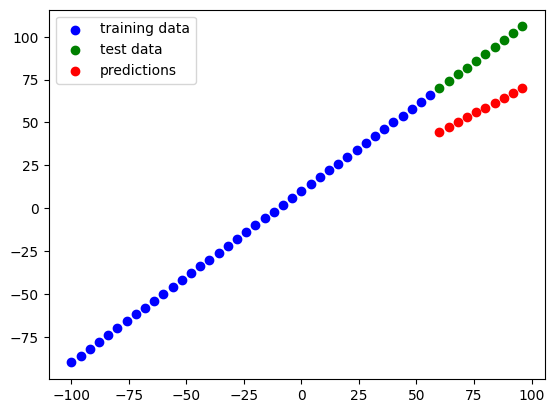

In [ ]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
mae_1 = mae(y_pred=y_pred_1)
mse_1 = mse(y_pred=y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.735235>,
 <tf.Tensor: shape=(), dtype=float32, numpy=955.1835>)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 32.0400 - mae: 32.0400
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 19.6795 - mae: 19.6795
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 13.4480 - mae: 13.4480
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 4.9633 - mae: 4.9633
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.9942 - mae: 11.9942
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0983 - mae: 10.0983
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0576 - mae: 11.0576
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 12.3616 - mae: 12.3616
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 27.0942 - mae: 27.0942
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 14.9686 - mae: 14.9686
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

1/1 [==============================] - 0s 72ms/step


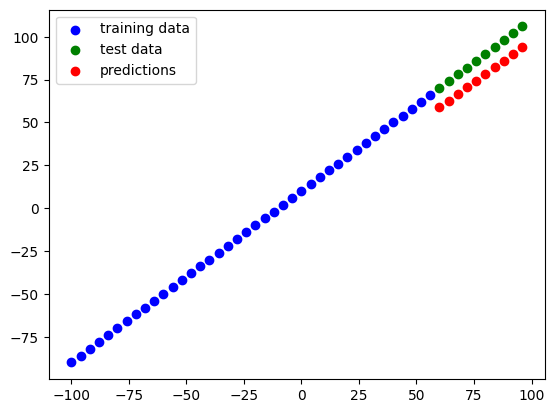

In [ ]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)


In [ ]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.692758>,
 <tf.Tensor: shape=(), dtype=float32, numpy=136.84329>)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 11ms/step - loss: 43.3098 - mae: 43.3098
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 15.0855 - mae: 15.0855
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 5.9462 - mae: 5.9462
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0888 - mae: 11.0888
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 12.1098 - mae: 12.1098
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 12.6606 - mae: 12.6606
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 10.2114 - mae: 10.2114
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 12.9755 - mae: 12.9755
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 23.2407 - mae: 23.2407
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 10.7535 - mae: 10.7535
Epoch 11/500
2/2 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 43ms/step


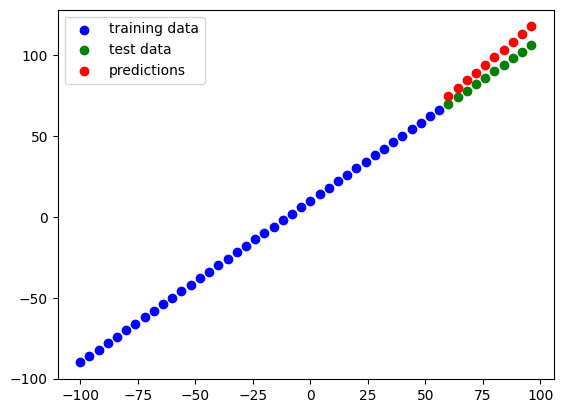

In [ ]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=8.2506>,
 <tf.Tensor: shape=(), dtype=float32, numpy=72.717125>)

In [ ]:
y_test, tf.squeeze(y_pred_1), tf.squeeze(y_pred_2), tf.squeeze(y_pred_3)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([44.348377, 47.218685, 50.088993, 52.9593  , 55.82961 , 58.699917,
        61.57023 , 64.44054 , 67.31084 , 70.18115 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([58.85607 , 62.734108, 66.612144, 70.49018 , 74.368225, 78.24626 ,
        82.1243  , 86.00234 , 89.88038 , 93.758415], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 74.87411 ,  79.624435,  84.37477 ,  89.1251  ,  93.875435,
         98.62577 , 103.3761  , 108.12642 , 112.87676 , 117.6271  ],
       dtype=float32)>)

In [ ]:
# comparing models

import pandas as pd

model_results = [['model_1',mae_1.numpy(),mse_1.numpy()],
                 ['model_2',mae_2.numpy(),mse_2.numpy()],
                 ['model_3',mae_3.numpy(),mse_3.numpy()]]

fin_results = pd.DataFrame(model_results,columns=['model','mae','mse'])
fin_results

,model,mae,mse
0,model_1,30.735235,955.183472
1,model_2,11.692758,136.843292
2,model_3,8.250600,72.717125


### **saving and exporting models --**

SavedModel format, and HDF5 format


In [ ]:
model_3.save('best_model_SavedModel_format')

In [ ]:
model_3.save('best_model_HDF5_format.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# models are saved, can check in folder tab in sidebar

### **Loading a saved model**

In [ ]:
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                20        
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# similarly for the hdf5 one

### **Larger Example**

In [ ]:
# import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# one-hot encode our dataset
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# now, creating features and labels

X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']


In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 20% test size
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['mae'])

insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 6s 4ms/step - loss: 13282.5137 - mae: 13282.5137
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.8760 - mae: 13104.8760
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12739.4688 - mae: 12739.4688
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12151.8643 - mae: 12151.8643
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11346.0742 - mae: 11346.0742
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 10403.8145 - mae: 10403.8145
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 9474.1807 - mae: 9474.1807
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 8638.8242 - mae: 8638.8242
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 8018.0840 - mae: 8018.0840
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7652.7100 - ma

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5928.7886 - mae: 5928.7886


[5928.78857421875, 5928.78857421875]

In [ ]:
y_train.mean(), y_train.median()

(13346.089736364485, 9575.4421)

In [ ]:
# thus we can see that a mae of 6145 isnt too good, make a new improved model

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=['mae'])

history = insurance_model_2.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 12662.6494 - mae: 12662.6494
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 8113.6001 - mae: 8113.6001
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.0854 - mae: 7429.0854
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7252.5288 - mae: 7252.5288
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 7113.1777 - mae: 7113.1777
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 6947.9946 - mae: 6947.9946
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 6753.7642 - mae: 6753.7642
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 6538.5029 - mae: 6538.5029
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 6400.2026 - mae: 6400.2026
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 6301.2939 - mae: 6301.29

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1767.4292 - mae: 1767.4292


[1767.42919921875, 1767.42919921875]

Text(0.5, 0, 'epochs')

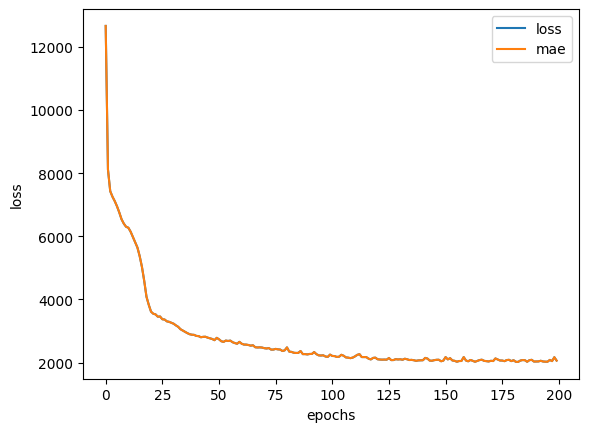

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
#plotting the loss curve

In [ ]:
# how long you should train for depends, early stopping callback can be used (later)

### **Preprocessing (normalization and standardization)**

neural networks tend to prefer normalization (MinMax Scaler)

standardization (standard scaler)

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


<Axes: ylabel='Frequency'>

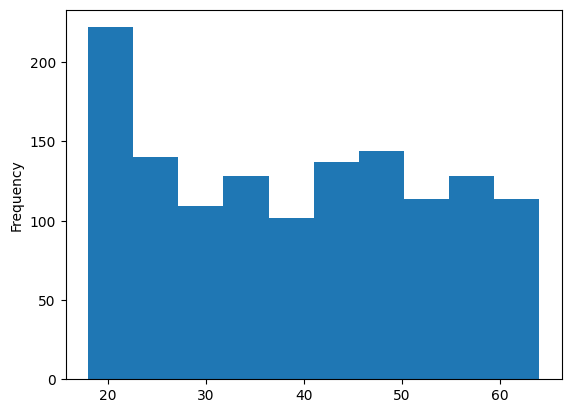

In [ ]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

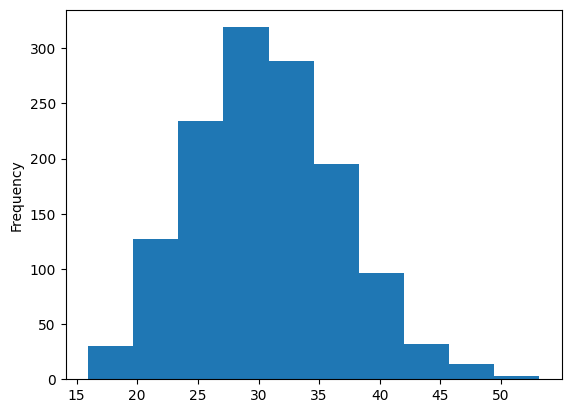

In [ ]:
X['bmi'].plot(kind='hist')

In [ ]:
# these have varying ranges, to change the features (scaling the features) so that theyre converted to a similar range (usually between 0 and 1)

In [ ]:
# often used as the default scaler for neural networks
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']), # columns to be normalized
    (OneHotEncoder(),['sex','smoker','region']) # columns to be one hot encoded
)

#create X and y

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

ct.fit(X_train) # fit ct to training data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=['mae'])

history = insurance_model_3.fit(X_train_normal,y_train,epochs=250)

Epoch 1/250
34/34 [==============================] - 2s 4ms/step - loss: 11234.9658 - mae: 11234.9658
Epoch 2/250
34/34 [==============================] - 0s 3ms/step - loss: 7213.5928 - mae: 7213.5928
Epoch 3/250
34/34 [==============================] - 0s 3ms/step - loss: 4531.8291 - mae: 4531.8291
Epoch 4/250
34/34 [==============================] - 0s 3ms/step - loss: 3487.8887 - mae: 3487.8887
Epoch 5/250
34/34 [==============================] - 0s 3ms/step - loss: 3333.2744 - mae: 3333.2744
Epoch 6/250
34/34 [==============================] - 0s 4ms/step - loss: 3345.7437 - mae: 3345.7437
Epoch 7/250
34/34 [==============================] - 0s 3ms/step - loss: 3228.4543 - mae: 3228.4543
Epoch 8/250
34/34 [==============================] - 0s 3ms/step - loss: 3236.7512 - mae: 3236.7512
Epoch 9/250
34/34 [==============================] - 0s 4ms/step - loss: 3129.8245 - mae: 3129.8245
Epoch 10/250
34/34 [==============================] - 0s 3ms/step - loss: 3069.2917 - mae: 3069.29

In [ ]:
insurance_model_3.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1789.5818 - mae: 1789.5818


[1789.581787109375, 1789.581787109375]

Text(0.5, 0, 'epochs')

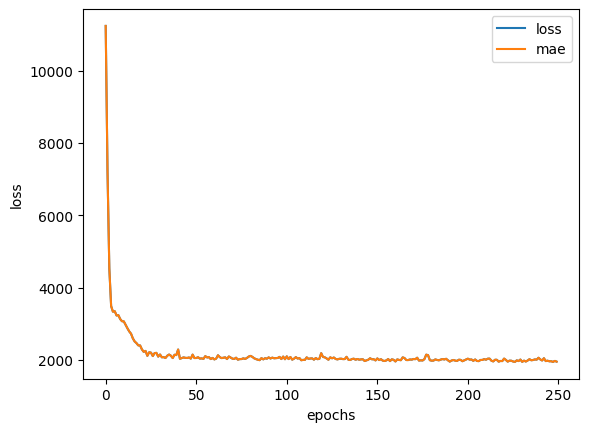

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')